In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [3]:
from qiskit.quantum_info import entropy, DensityMatrix

In [4]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_13424\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-06-12 09:10:51,680: Credentials are already in use. The existing account in the session will be replaced.


ibm_perth                    ibm_nairobi                  ibm_lagos
---------                    -----------                  ---------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 168            Pending Jobs: 55             Pending Jobs: 69
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      146.4          Avg. T1:      115.2          Avg. T1:      134.2
Avg. T2:      121.9          Avg. T2:      69.3           Avg. T2:      88.1



ibmq_manila                  ibmq_jakarta                 ibmq_quito
-----------                  ------------                 ----------
Num. Qubits:  5              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 107            Pending Jobs: 43             Pending Jobs: 22
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operatio

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
%run init-qiskit_optical_elements.ipynb

In [7]:
device = provider.get_backend('ibm_nairobi')

# Irrealidade dos átomos $WZ$ fora do IMZ

## BBO$_{p}$ - Fora do IMZ - QWP$_{in}$

In [9]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
rhoWZ_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
Phi_WZ_0bWZ_in           = np.zeros(th.shape[0], dtype=object)
Irr_WZ_in                = np.zeros(th.shape[0], dtype=object)
jobs_ids_WZ_in = []

<img src = 'setup_realism.jpg' width = '90%'>

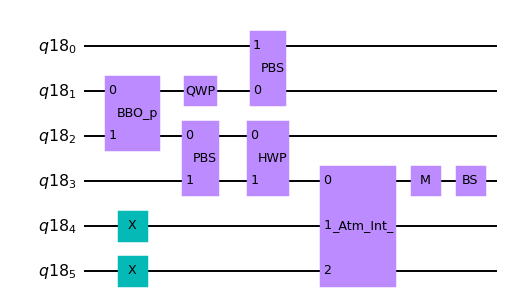

In [10]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

In [12]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=9
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-03 - 13:47:35

--------------------------------------

j =  9  - theta = 1.419216694115407
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-03 - 14:18:17
chtmtc391dmpcngq33t0
k =  0

k =  1
Job Status: job has successfully run
2023-06-03 - 14:26:02
chtnbsj91dmpcngqeai0
k =  1

k =  2
Job Status: job has successfully run
2023-06-03 - 14:33:23
chtnfbpvrup8981la8n0
k =  2

k =  3
Job Status: job has successfully run
2023-06-03 - 15:11:38
chtniq2i3durlgr0fro0
k =  3

k =  4
Job Status: job has successfully run
2023-06-03 - 15:17:14
chto4o3gsimdkuls5fm0
k =  4

k =  5
Job Status: job has successfully run
2023-06-03 - 15:51:56
chto7c3gsimdkuls7ef0
k =  5

k =  6
Job Status: job has successfully run
2023-06-03 - 15:58:56
chtonkhoq2qn3r254820
k =  6

k =  7
Job Status: job has successfully run
2023-06-03 - 16:04:08
chtoqt8recnk2p4o2e10
k =  7

k =  8
Job Status: job has successfully run
2023-06-03 - 16:08:55
chtotb8recnk2p4o4gog
k

In [13]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 8758.49 segundos
Tempo de execução: 145.97 minutos
Tempo de execução: 2.43 horas


In [14]:
x

['chtmtc391dmpcngq33t0',
 'chtnbsj91dmpcngqeai0',
 'chtnfbpvrup8981la8n0',
 'chtniq2i3durlgr0fro0',
 'chto4o3gsimdkuls5fm0',
 'chto7c3gsimdkuls7ef0',
 'chtonkhoq2qn3r254820',
 'chtoqt8recnk2p4o2e10',
 'chtotb8recnk2p4o4gog',
 'chtovj9oq2qn3r25b3ig']

In [15]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig']]

In [16]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=8
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-03 - 17:03:11

--------------------------------------

j =  8  - theta = 1.2626370614359173
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-03 - 17:32:15
chtpp1b91dmpcngsb7ag
k =  0

k =  1
Job Status: job has successfully run
2023-06-03 - 17:42:49
chtq6lai3durlgr2epv0
k =  1

k =  2
Job Status: job has successfully run
2023-06-03 - 17:57:13
chtqbjjgsimdkultrnb0
k =  2

k =  3
Job Status: job has successfully run
2023-06-03 - 18:08:07
chtqibhvrup8981nqia0
k =  3

k =  4
Job Status: job has successfully run
2023-06-03 - 18:16:40
chtqnf0recnk2p4pg5hg
k =  4

k =  5
Job Status: job has successfully run
2023-06-05 - 00:46:30
chtqrfii3durlgr2uus0
k =  5

k =  6
Job Status: job has successfully run
2023-06-05 - 00:56:02
chull7b91dmpcnhkg4cg
k =  6

k =  7
Job Status: job has successfully run
2023-06-05 - 01:04:45
chulpqqi3durlgrq33g0
k =  7

k =  8
Job Status: job has successfully run
2023-06-05 - 01:17:02
chultopoq2qn3r2uf460


In [17]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 116534.57 segundos
Tempo de execução: 1942.24 minutos
Tempo de execução: 32.37 horas


In [18]:
x

['chtpp1b91dmpcngsb7ag',
 'chtq6lai3durlgr2epv0',
 'chtqbjjgsimdkultrnb0',
 'chtqibhvrup8981nqia0',
 'chtqnf0recnk2p4pg5hg',
 'chtqrfii3durlgr2uus0',
 'chull7b91dmpcnhkg4cg',
 'chulpqqi3durlgrq33g0',
 'chultopoq2qn3r2uf460',
 'chum3grgsimdkumm4il0']

In [19]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0']]

In [20]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=7
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-05 - 07:20:25

--------------------------------------

j =  7  - theta = 1.1060574287564275
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-05 - 07:31:01
churdspoq2qn3r330ic0
k =  0

k =  1
Job Status: job has successfully run
2023-06-05 - 07:39:18
churiqjgsimdkumqlof0
k =  1

k =  2
Job Status: job has successfully run
2023-06-05 - 07:47:51
churmn2i3durlgrurgmg
k =  2

k =  3
Job Status: job has successfully run
2023-06-05 - 07:55:47
churqnj91dmpcnhpi9t0
k =  3

k =  4
Job Status: job has successfully run
2023-06-05 - 08:17:29
churue1vrup8982lkdug
k =  4

k =  5
Job Status: job has successfully run
2023-06-05 - 08:33:45
chus8jqi3durlgrv8s90
k =  5

k =  6
Job Status: job has successfully run
2023-06-05 - 08:41:53
chusg91vrup8982m2h00
k =  6

k =  7
Job Status: job has successfully run
2023-06-05 - 08:50:43
chusk1hvrup8982m5gfg
k =  7

k =  8
Job Status: job has successfully run
2023-06-05 - 09:28:23
chuso7hoq2qn3r3413fg


In [21]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 8180.9 segundos
Tempo de execução: 136.35 minutos
Tempo de execução: 2.27 horas


In [22]:
x

['churdspoq2qn3r330ic0',
 'churiqjgsimdkumqlof0',
 'churmn2i3durlgrurgmg',
 'churqnj91dmpcnhpi9t0',
 'churue1vrup8982lkdug',
 'chus8jqi3durlgrv8s90',
 'chusg91vrup8982m2h00',
 'chusk1hvrup8982m5gfg',
 'chuso7hoq2qn3r3413fg',
 'chut9thoq2qn3r34dgg0']

In [23]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0']]

In [24]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=6
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-05 - 09:36:47

--------------------------------------

j =  6  - theta = 0.9494777960769379
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-05 - 09:44:41
chutdpj91dmpcnhqn1vg
k =  0

k =  1
Job Status: job has successfully run
2023-06-05 - 09:52:29
chuthg391dmpcnhqpqq0
k =  1

k =  2
Job Status: job has successfully run
2023-06-05 - 10:00:53
chutl5qi3durlgs08e20
k =  2

k =  3
Job Status: job has successfully run
2023-06-05 - 10:18:30
chutp2grecnk2p5nn6b0
k =  3

k =  4
Job Status: job has successfully run
2023-06-05 - 10:36:23
chuu1apoq2qn3r350v10
k =  4

k =  5
Job Status: job has successfully run
2023-06-05 - 10:45:20
chuu9n8recnk2p5o5glg
k =  5

k =  6
Job Status: job has successfully run
2023-06-05 - 18:56:31
chuudtii3durlgs0t2vg
k =  6

k =  7
Job Status: job has successfully run
2023-06-06 - 02:22:05
chv5k6bekvbiqafbeeq0
k =  7

k =  8
Job Status: job has successfully run
2023-06-06 - 09:35:40
chvc51apvii3c2pval1g


In [25]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 113878.25 segundos
Tempo de execução: 1897.97 minutos
Tempo de execução: 31.63 horas


In [26]:
x

['chutdpj91dmpcnhqn1vg',
 'chuthg391dmpcnhqpqq0',
 'chutl5qi3durlgs08e20',
 'chutp2grecnk2p5nn6b0',
 'chuu1apoq2qn3r350v10',
 'chuu9n8recnk2p5o5glg',
 'chuudtii3durlgs0t2vg',
 'chv5k6bekvbiqafbeeq0',
 'chvc51apvii3c2pval1g',
 'chvig9f2rsd594vnjja0']

In [27]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [28]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=5
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-06 - 17:14:47

--------------------------------------

j =  5  - theta = 0.7928981633974483
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-07 - 06:40:35
chvp7falnlj7ii800820
k =  0

k =  1
Job Status: job has successfully run
2023-06-07 - 07:44:06
ci05170ihcilpv54nt4g
k =  1

k =  2
Job Status: job has successfully run
2023-06-07 - 08:51:47
ci05uv13lqnvrkvb82e0
k =  2

k =  3
Job Status: job has successfully run
2023-06-07 - 09:24:17
ci06umilnlj7ii8at3mg
k =  3

k =  4
Job Status: job has successfully run
2023-06-07 - 13:36:13
ci07dtoihcilpv56ishg
k =  4

k =  5
Job Status: job has successfully run
2023-06-07 - 17:50:53
ci0b40ukcccjrh008ugg
k =  5

k =  6
Job Status: job has successfully run
2023-06-08 - 03:16:20
ci0erdgihcilpv5f8s4g
k =  6

k =  7
Job Status: job has successfully run
2023-06-08 - 11:36:28
ci0n4g6kcccjrh0bl790
k =  7

k =  8
Job Status: job has successfully run
2023-06-08 - 16:36:44
ci0uetm1o26hu31u82t0


In [29]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 197049.29 segundos
Tempo de execução: 3284.15 minutos
Tempo de execução: 54.74 horas


In [30]:
x

['chvp7falnlj7ii800820',
 'ci05170ihcilpv54nt4g',
 'ci05uv13lqnvrkvb82e0',
 'ci06umilnlj7ii8at3mg',
 'ci07dtoihcilpv56ishg',
 'ci0b40ukcccjrh008ugg',
 'ci0erdgihcilpv5f8s4g',
 'ci0n4g6kcccjrh0bl790',
 'ci0uetm1o26hu31u82t0',
 'ci12rl8ihcilpv6460tg']

In [31]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [32]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=4
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-08 - 23:58:58

--------------------------------------

j =  4  - theta = 0.6363185307179586
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-09 - 01:18:14
ci19au9cinbchsh0f1cg
k =  0

k =  1
Job Status: job has successfully run
2023-06-09 - 02:42:15
ci1ag3u1o26hu329a2qg
k =  1

k =  2
Job Status: job has successfully run
2023-06-09 - 03:56:50
ci1bnfh3lqnvrkokckig
k =  2

k =  3
Job Status: job has successfully run
2023-06-09 - 08:43:50
ci1cqe1cinbchsh3hvo0
k =  3

k =  4
Job Status: job has successfully run
2023-06-09 - 11:12:56
ci1h0vekcccjrh17fql0
k =  4

k =  5
Job Status: job has successfully run
2023-06-09 - 13:12:55
ci1j6s8ihcilpv6k1d40
k =  5

k =  6
Job Status: job has successfully run
2023-06-09 - 17:24:02
ci1kv3e1o26hu32l4fpg
k =  6

k =  7
Job Status: job has successfully run
2023-06-09 - 18:40:15
ci1okru1o26hu32pf0hg
k =  7

k =  8
Job Status: job has successfully run
2023-06-09 - 21:14:09
ci1pohhcinbchshi6seg


In [33]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 104698.05 segundos
Tempo de execução: 1744.97 minutos
Tempo de execução: 29.08 horas


In [34]:
x

['ci19au9cinbchsh0f1cg',
 'ci1ag3u1o26hu329a2qg',
 'ci1bnfh3lqnvrkokckig',
 'ci1cqe1cinbchsh3hvo0',
 'ci1h0vekcccjrh17fql0',
 'ci1j6s8ihcilpv6k1d40',
 'ci1kv3e1o26hu32l4fpg',
 'ci1okru1o26hu32pf0hg',
 'ci1pohhcinbchshi6seg',
 'ci1s0malnlj7iia0kv0g']

In [35]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [36]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=3
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-10 - 05:03:58

--------------------------------------

j =  3  - theta = 0.479738898038469
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-10 - 05:14:26
ci22st2lnlj7iia6fc30
k =  0

k =  1
Job Status: job has successfully run
2023-06-10 - 05:25:30
ci231qm1o26hu332lip0
k =  1

k =  2
Job Status: job has successfully run
2023-06-10 - 05:36:40
ci236vp3lqnvrkpd7jt0
k =  2

k =  3
Job Status: job has successfully run
2023-06-10 - 05:47:38
ci23c7ekcccjrh1p90rg
k =  3

k =  4
Job Status: job has successfully run
2023-06-10 - 05:59:40
ci23hc13lqnvrkpdgelg
k =  4

k =  5
Job Status: job has successfully run
2023-06-10 - 06:17:52
ci23n0m1o26hu3337d9g
k =  5

k =  6
Job Status: job has successfully run
2023-06-10 - 06:31:18
ci23vhm1o26hu333e2ug
k =  6

k =  7
Job Status: job has successfully run
2023-06-10 - 06:43:17
ci245r13lqnvrkpe170g
k =  7

k =  8
Job Status: job has successfully run
2023-06-10 - 06:52:15
ci24beoihcilpv74cdjg
k

In [37]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 7169.81 segundos
Tempo de execução: 119.5 minutos
Tempo de execução: 1.99 horas


In [38]:
x

['ci22st2lnlj7iia6fc30',
 'ci231qm1o26hu332lip0',
 'ci236vp3lqnvrkpd7jt0',
 'ci23c7ekcccjrh1p90rg',
 'ci23hc13lqnvrkpdgelg',
 'ci23n0m1o26hu3337d9g',
 'ci23vhm1o26hu333e2ug',
 'ci245r13lqnvrkpe170g',
 'ci24beoihcilpv74cdjg',
 'ci24flalnlj7iia7olq0']

In [39]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [40]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=2
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-10 - 11:01:20

--------------------------------------

j =  2  - theta = 0.3231592653589793
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-10 - 11:11:24
ci284dpcinbchshurphg
k =  0

k =  1
Job Status: job has successfully run
2023-06-10 - 11:29:16
ci28949cinbchshuvjeg
k =  1

k =  2
Job Status: job has successfully run
2023-06-10 - 11:36:54
ci28hge1o26hu337deog
k =  2

k =  3
Job Status: job has successfully run
2023-06-10 - 11:46:23
ci28l2oihcilpv783d40
k =  3

k =  4
Job Status: job has successfully run
2023-06-10 - 11:57:39
ci28phekcccjrh1tttr0
k =  4

k =  5
Job Status: job has successfully run
2023-06-10 - 12:05:25
ci28uq8ihcilpv78aqlg
k =  5

k =  6
Job Status: job has successfully run
2023-06-10 - 12:24:26
ci292eukcccjrh1u4p30
k =  6

k =  7
Job Status: job has successfully run
2023-06-10 - 12:43:48
ci29bc6kcccjrh1uc2mg
k =  7

k =  8
Job Status: job has successfully run
2023-06-10 - 13:02:55
ci29kehcinbchsi027n0


In [41]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 8121.33 segundos
Tempo de execução: 135.36 minutos
Tempo de execução: 2.26 horas


In [42]:
x

['ci284dpcinbchshurphg',
 'ci28949cinbchshuvjeg',
 'ci28hge1o26hu337deog',
 'ci28l2oihcilpv783d40',
 'ci28phekcccjrh1tttr0',
 'ci28uq8ihcilpv78aqlg',
 'ci292eukcccjrh1u4p30',
 'ci29bc6kcccjrh1uc2mg',
 'ci29kehcinbchsi027n0',
 'ci29td93lqnvrkpj0glg']

In [43]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [44]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=1
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-10 - 13:16:43

--------------------------------------

j =  1  - theta = 0.16657963267948966
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-10 - 13:50:11
ci2a3s1cinbchsi0e7jg
k =  0

k =  1
Job Status: job has successfully run
2023-06-10 - 14:08:09
ci2ajj2lnlj7iiacrrl0
k =  1

k =  2
Job Status: job has successfully run
2023-06-10 - 20:54:43
ci2arvoihcilpv79sk1g
k =  2

k =  3
Job Status: job has successfully run
2023-06-11 - 04:21:33
ci2gqi9cinbchsi6jjog
k =  3

k =  4
Job Status: job has successfully run
2023-06-11 - 06:49:36
ci2nc11cinbchsibcojg
k =  4

k =  5
Job Status: job has successfully run
2023-06-11 - 06:57:21
ci2phdu1o26hu33lajg0
k =  5

k =  6
Job Status: job is actively running

Erro detectado:  'status'

2023-06-11 - 11:18:40



In [45]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 79315.16 segundos
Tempo de execução: 1321.92 minutos
Tempo de execução: 22.03 horas


In [46]:
x

['ci2a3s1cinbchsi0e7jg',
 'ci2ajj2lnlj7iiacrrl0',
 'ci2arvoihcilpv79sk1g',
 'ci2gqi9cinbchsi6jjog',
 'ci2nc11cinbchsibcojg',
 'ci2phdu1o26hu33lajg0']

In [47]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [52]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=1
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(6, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-11 - 21:22:40

--------------------------------------

j =  1  - theta = 0.16657963267948966
--------------------------------------

k =  6
Job Status: job has successfully run
2023-06-11 - 23:20:13
ci36am6kcccjrh2kg75g
k =  6

k =  7
Job Status: job has successfully run
2023-06-11 - 23:28:06
ci381pe1o26hu33vdie0
k =  7

k =  8
Job Status: job has successfully run
2023-06-11 - 23:35:50
ci385eukcccjrh2lndhg
k =  8

k =  9
Job Status: job has successfully run
2023-06-11 - 23:43:27
ci3892qlnlj7iib2qgh0
k =  9

2023-06-11 - 23:43:32



In [53]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 8450.33 segundos
Tempo de execução: 140.84 minutos
Tempo de execução: 2.35 horas


In [46]:
x

['ci2a3s1cinbchsi0e7jg',
 'ci2ajj2lnlj7iiacrrl0',
 'ci2arvoihcilpv79sk1g',
 'ci2gqi9cinbchsi6jjog',
 'ci2nc11cinbchsibcojg',
 'ci2phdu1o26hu33lajg0']

In [47]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [48]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=0
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-11 - 11:18:40

--------------------------------------

j =  0  - theta = 0.01
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-11 - 11:46:59
ci2tfhhcinbchsig2a3g
k =  0

k =  1
Job Status: job has successfully run
2023-06-11 - 12:20:30
ci2tsq1cinbchsigaj4g
k =  1

k =  2
Job Status: job has successfully run
2023-06-11 - 12:54:03
ci2uchoihcilpv7pc790
k =  2

k =  3
Job Status: job is actively running

Erro detectado:  'status'

2023-06-11 - 17:06:54



In [49]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 20892.38 segundos
Tempo de execução: 348.21 minutos
Tempo de execução: 5.8 horas


In [50]:
x

['ci2tfhhcinbchsig2a3g', 'ci2tsq1cinbchsigaj4g', 'ci2uchoihcilpv7pc790']

In [51]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [54]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=0
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(3, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-11 - 23:43:32

--------------------------------------

j =  0  - theta = 0.01
--------------------------------------

k =  3
Job Status: job has successfully run
2023-06-11 - 23:51:21
ci38cm1cinbchsin8scg
k =  3

k =  4
Job Status: job has successfully run
2023-06-11 - 23:59:09
ci38gbilnlj7iib2us00
k =  4

k =  5
Job Status: job has successfully run
2023-06-12 - 00:06:56
ci38k0oihcilpv005050
k =  5

k =  6
Job Status: job has successfully run
2023-06-12 - 00:19:37
ci38nl9cinbchsinf5k0
k =  6

k =  7
Job Status: job has successfully run
2023-06-12 - 00:58:09
ci38tjhcinbchsinifpg
k =  7

k =  8
Job Status: job has successfully run
2023-06-12 - 01:07:52
ci39flu1o26hu3407dc0
k =  8

k =  9
Job Status: job has successfully run
2023-06-12 - 01:15:32
ci39k71cinbchsinv2b0
k =  9

2023-06-12 - 01:15:36



In [55]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 5522.95 segundos
Tempo de execução: 92.05 minutos
Tempo de execução: 1.53 horas


In [46]:
x

['ci2a3s1cinbchsi0e7jg',
 'ci2ajj2lnlj7iiacrrl0',
 'ci2arvoihcilpv79sk1g',
 'ci2gqi9cinbchsi6jjog',
 'ci2nc11cinbchsibcojg',
 'ci2phdu1o26hu33lajg0']

In [47]:
jobs_ids_WZ_in

[['chtmtc391dmpcngq33t0',
  'chtnbsj91dmpcngqeai0',
  'chtnfbpvrup8981la8n0',
  'chtniq2i3durlgr0fro0',
  'chto4o3gsimdkuls5fm0',
  'chto7c3gsimdkuls7ef0',
  'chtonkhoq2qn3r254820',
  'chtoqt8recnk2p4o2e10',
  'chtotb8recnk2p4o4gog',
  'chtovj9oq2qn3r25b3ig'],
 ['chtpp1b91dmpcngsb7ag',
  'chtq6lai3durlgr2epv0',
  'chtqbjjgsimdkultrnb0',
  'chtqibhvrup8981nqia0',
  'chtqnf0recnk2p4pg5hg',
  'chtqrfii3durlgr2uus0',
  'chull7b91dmpcnhkg4cg',
  'chulpqqi3durlgrq33g0',
  'chultopoq2qn3r2uf460',
  'chum3grgsimdkumm4il0'],
 ['churdspoq2qn3r330ic0',
  'churiqjgsimdkumqlof0',
  'churmn2i3durlgrurgmg',
  'churqnj91dmpcnhpi9t0',
  'churue1vrup8982lkdug',
  'chus8jqi3durlgrv8s90',
  'chusg91vrup8982m2h00',
  'chusk1hvrup8982m5gfg',
  'chuso7hoq2qn3r3413fg',
  'chut9thoq2qn3r34dgg0'],
 ['chutdpj91dmpcnhqn1vg',
  'chuthg391dmpcnhqpqq0',
  'chutl5qi3durlgs08e20',
  'chutp2grecnk2p5nn6b0',
  'chuu1apoq2qn3r350v10',
  'chuu9n8recnk2p5o5glg',
  'chuudtii3durlgs0t2vg',
  'chv5k6bekvbiqafbeeq0',
  'chvc51

In [11]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=10
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_in.append(x)

ibm_nairobi

2023-06-12 - 09:11:39

--------------------------------------

j = 10  - theta = 1.5757963267948967
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-12 - 14:04:02
ci3gn6alnlj7iib8l9c0
k =  0

k =  1
Job Status: job is queued (None)

Erro detectado:  '"Unrecognized return value received from the server: b\'\'. This could be caused by too many requests."'

2023-06-12 - 17:06:31



In [12]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 28490.19 segundos
Tempo de execução: 474.84 minutos
Tempo de execução: 7.91 horas


In [13]:
x

['ci3gn6alnlj7iib8l9c0']

In [14]:
jobs_ids_WZ_in